In [6]:
import seisbench
import seisbench.data as sbd
import matplotlib.pyplot as plt

In [3]:
data = sbd.DummyDataset()
print(data)

2025-04-03 01:01:15,271 | seisbench | WARNING | Output component order not specified, defaulting to 'ZNE'.


DummyDataset - 100 traces


In [4]:
import os
print("Cache root:", seisbench.cache_root)
print("Contents:", os.listdir(seisbench.cache_root))
print("datasets:", os.listdir(seisbench.cache_root / "datasets"))
print("dummydataset:", os.listdir(seisbench.cache_root / "datasets" / "dummydataset"))

Cache root: C:\Users\huzai\.seisbench
Contents: ['config.json', 'datasets']
datasets: ['dummydataset']
dummydataset: ['metadata.csv', 'raw_catalog.csv', 'waveforms.hdf5']


In [5]:
data.metadata

,index,trace_start_time,source_latitude_deg,source_longitude_deg,source_depth_km,source_event_category,source_magnitude,source_magnitude_uncertainty,source_magnitude2,source_magnitude_uncertainty2,...,station_latitude_deg,station_longitude_deg,station_elevation_m,source_magnitude_type,source_magnitude_type2,split,trace_name_original,trace_chunk,trace_sampling_rate_hz,trace_component_order
0,0,2007/01/01 01:42:45.08,-20.43802,-69.27681,83.18,ID,1.353,0.014,1.426,0.011,...,-21.04323,-69.4874,900.0,MA,ML,train,2007_01_01 01_42_45_08,,20,ZNE
1,1,2007/01/01 02:41:13.75,-21.64059,-68.41443,118.38,ID,1.981,0.020,2.027,0.023,...,-21.04323,-69.4874,900.0,MA,ML,train,2007_01_01 02_41_13_75,,20,ZNE
2,2,2007/01/01 03:50:29.27,-21.84637,-68.53904,111.82,ID,2.719,0.024,2.811,0.026,...,-21.04323,-69.4874,900.0,MA,ML,train,2007_01_01 03_50_29_27,,20,ZNE
3,3,2007/01/01 05:40:02.55,-21.23950,-70.05063,34.95,UP,2.169,0.020,2.269,0.020,...,-21.04323,-69.4874,900.0,MA,ML,train,2007_01_01 05_40_02_55,,20,ZNE
4,4,2007/01/01 05:52:18.43,-21.81511,-68.65773,106.69,ID,2.028,0.021,2.080,0.024,...,-21.04323,-69.4874,900.0,MA,ML,train,2007_01_01 05_52_18_43,,20,ZNE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,2007/01/07 05:19:53.63,-21.02248,-68.96970,109.05,ID,1.464,0.016,1.513,0.021,...,-21.04323,-69.4874,900.0,MA,ML,test,2007_01_07 05_19_53_63,,20,ZNE
96,96,2007/01/07 05:25:44.43,-20.06507,-69.15500,93.64,ID,1.606,0.024,1.660,0.026,...,-21.04323,-69.4874,900.0,MA,ML,test,2007_01_07 05_25_44_43,,20,ZNE
97,97,2007/01/07 06:37:03.33,-21.13000,-68.90223,110.59,ID,1.530,0.012,1.574,0.013,...,-21.04323,-69.4874,900.0,MA,ML,test,2007_01_07 06_37_03_33,,20,ZNE
98,98,2007/01/07 06:39:20.08,-21.26966,-68.73751,120.06,ID,3.514,0.035,3.584,0.032,...,-21.04323,-69.4874,900.0,MA,ML,test,2007_01_07 06_39_20_08,,20,ZNE


In [9]:
waveforms = data.get_waveforms([3, 20, 45, 70])
print("waveforms.shape:", waveforms.shape)



waveforms.shape: (4, 3, 1200)


In [10]:
data = sbd.DummyDataset() # Reload to ensure we have the full dataset again

train = data.train()
dev = data.dev()
test = data.test()

print("Train:", train)
print("Dev:", dev)
print("Test:", test)

2025-04-03 01:04:42,134 | seisbench | WARNING | Output component order not specified, defaulting to 'ZNE'.


Train: DummyDataset - 60 traces
Dev: DummyDataset - 10 traces
Test: DummyDataset - 30 traces


In [11]:
data = sbd.DummyDataset(component_order="ZNE")
zne_array = data.get_waveforms(0)

data = sbd.DummyDataset(component_order="NEZ")
nez_array = data.get_waveforms(0)

print('ZNE:\n', zne_array[:, :5])
print('NEZ:\n', nez_array[:, :5])

ZNE:
 [[  34.   47.   51.   58.   72.]
 [-100.  -99.  -98.  -99.  -98.]
 [ 645.  636.  625.  619.  612.]]
NEZ:
 [[-100.  -99.  -98.  -99.  -98.]
 [ 645.  636.  625.  619.  612.]
 [  34.   47.   51.   58.   72.]]


In [13]:
data["trace_sampling_rate_hz"].value_counts()

trace_sampling_rate_hz
20    100
Name: count, dtype: int64

In [16]:
# Given values
sampling_rate = 20  # Hz (as per your metadata)
waveform_shape = (3, 6000)  # Shape of the waveforms

# Calculate duration per trace
num_samples = waveform_shape[1]
duration = num_samples / sampling_rate  # Duration in seconds

print(f"Duration of each trace: {duration} seconds")


Duration of each trace: 300.0 seconds


d:\thesis\thesis_seismology\.conda\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
d:\thesis\thesis_seismology\.conda\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


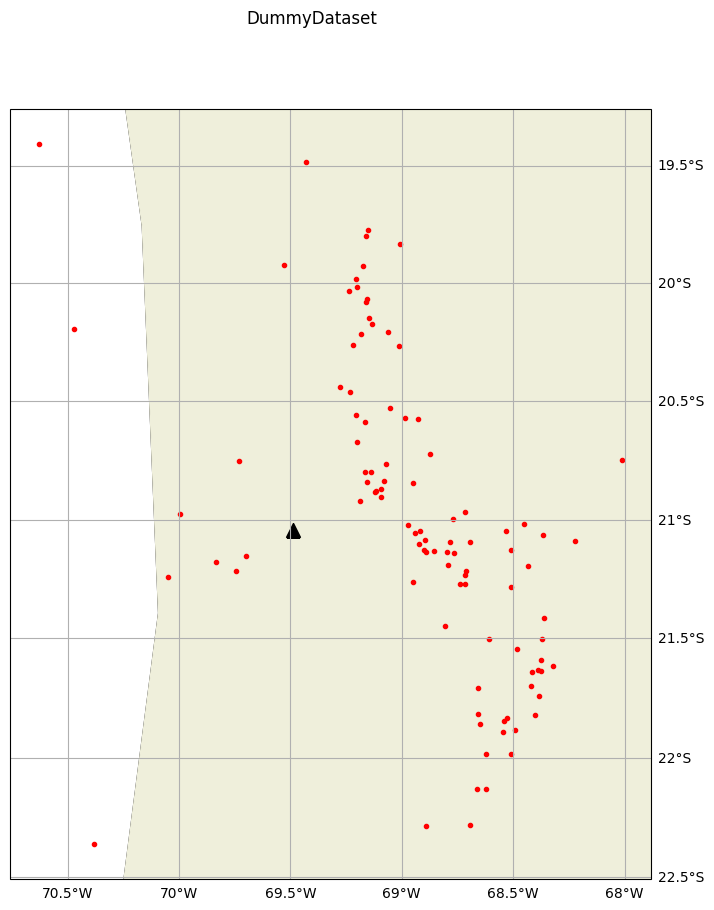

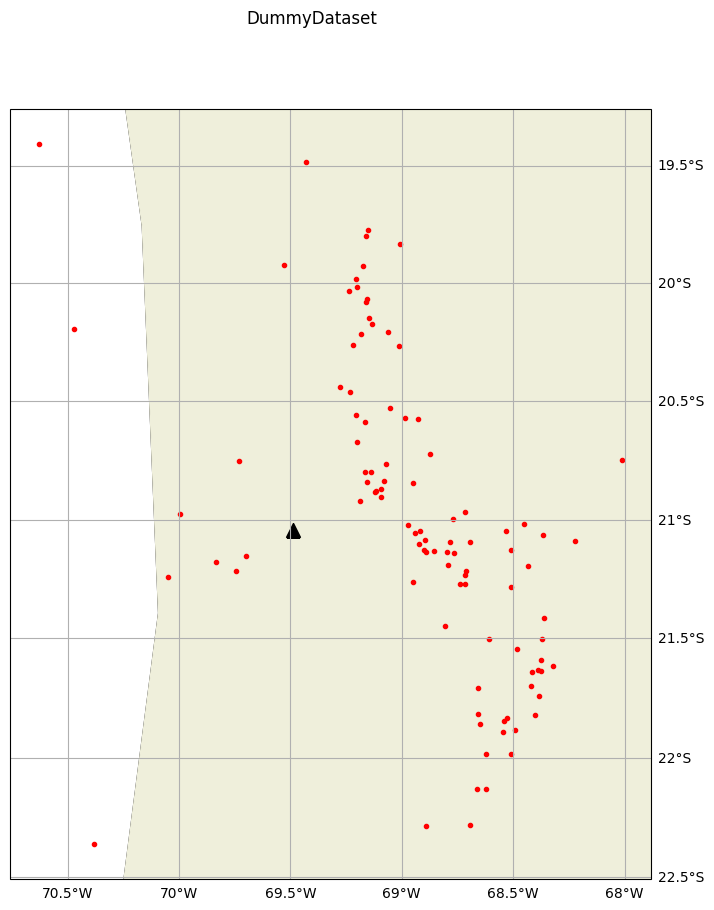

In [17]:
data.plot_map()